# A* search

A* enumerates paths until finding the solution, prioritizing those paths with minimum estimated total cost ($f = g + h$) and avoiding cycles.  

A* generalises UCS introducing the idea of heuristic function $h$, that estimates the cost of reaching a solution from the current node.  

Function $h$ is non-negative and zero for solution nodes.

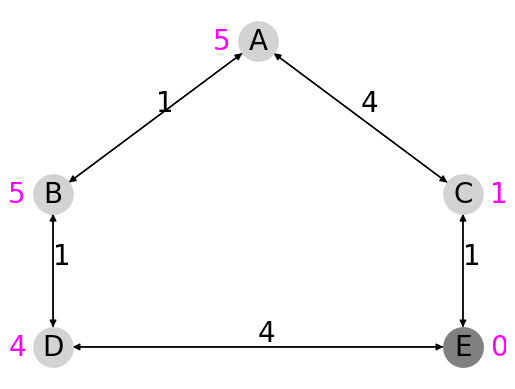

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('B','A'): 1, ('A', 'C'): 4, ('C','A'): 4, ('C','E'): 1, ('E','C'): 1, ('B','D'): 1, ('D','B'): 1, ('D','E'): 4, ('E','D'): 4}
h={"A": 5, "B": 5, "C": 1, "D": 4, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
pos_h = {'A': (18.25, 300), 'B': (8.25, 200), 'C': (31.75, 200), 'D': (8.25, 100), 'E': (31.75, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)


## A* algorithm with graph search
A*(G, source, h)  
> Open = InitHeap(source,0 + h(source))  
> Closed = $\emptyset$  
> while Open $\neq \emptyset$
>> s = Pop(Open)  
>> if Target(s) return s  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>>  $f_n$ = $g_s$ + $w(s,n)$ + h(n)  
>>>  if n $\notin$ Closed  
>>>>   if n $\notin$ Open  
>>>>>    Push(Open,n,$f_n$)  
>>>>   else
>>>>>    x = Open[n]  
>>>>>    if $f_n$ < x
>>>>>>    Update(Open,n,$f_n$)  
>>>  else // n $\in$ Closed  
>>>>   x = Closed[n]  
>>>>   if $f_n$ < x  
>>>>>    Delete(Closed[n])  
>>>>>    Push(Open,n,$f_n$)  
> return NULL

### A* implementation returning the target node that was reached

In [6]:
import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
# h is a heuristic function that for each node returns the cost of reaching a solution
def astar(G, W, source, Target, h):
  gn = 0
  fn = gn + h[source]
  Openh = []; heapq.heappush(Openh,(fn,gn,source)); 
  Opend = {}; Opend[source] = (gn,fn)
  Closed = {}
  while Openh != []:
    (fs,gs,s) = heapq.heappop(Openh); del Opend[s]
    if s in Target:
      return s
    Closed[s] = (gs,fs)
    for n in G[s]:
      gn = gs + W[(s,n)]
      fn = gn + h[n]
      if n not in Closed:
        if n not in Opend:
          heapq.heappush(Openh,(fn,gn,n)); Opend.update({n: (gn,fn)})
        else:
          (ogn,ofn) = Opend[n]
          # Existing node with better fn -> update
          if fn < ofn:
            Opend[n] = (gn,fn)
            i = Openh.index((ofn,ogn,n))
            Openh[i] = (fn,gn,n)
            heapq._siftdown(Openh,0,i)
      else:
        (ogn,ofn) = Closed[n]
        # Existing node with better fn -> update
        if fn < ofn:
          del Closed[n]
          heapq.heappush(Openh,(fn,gn,n)); Opend.update({n: (gn,fn)})
          
print(astar(G,W,source,Target,h))

E


### A* implementation graphically showing the sequence of nodes visited

E


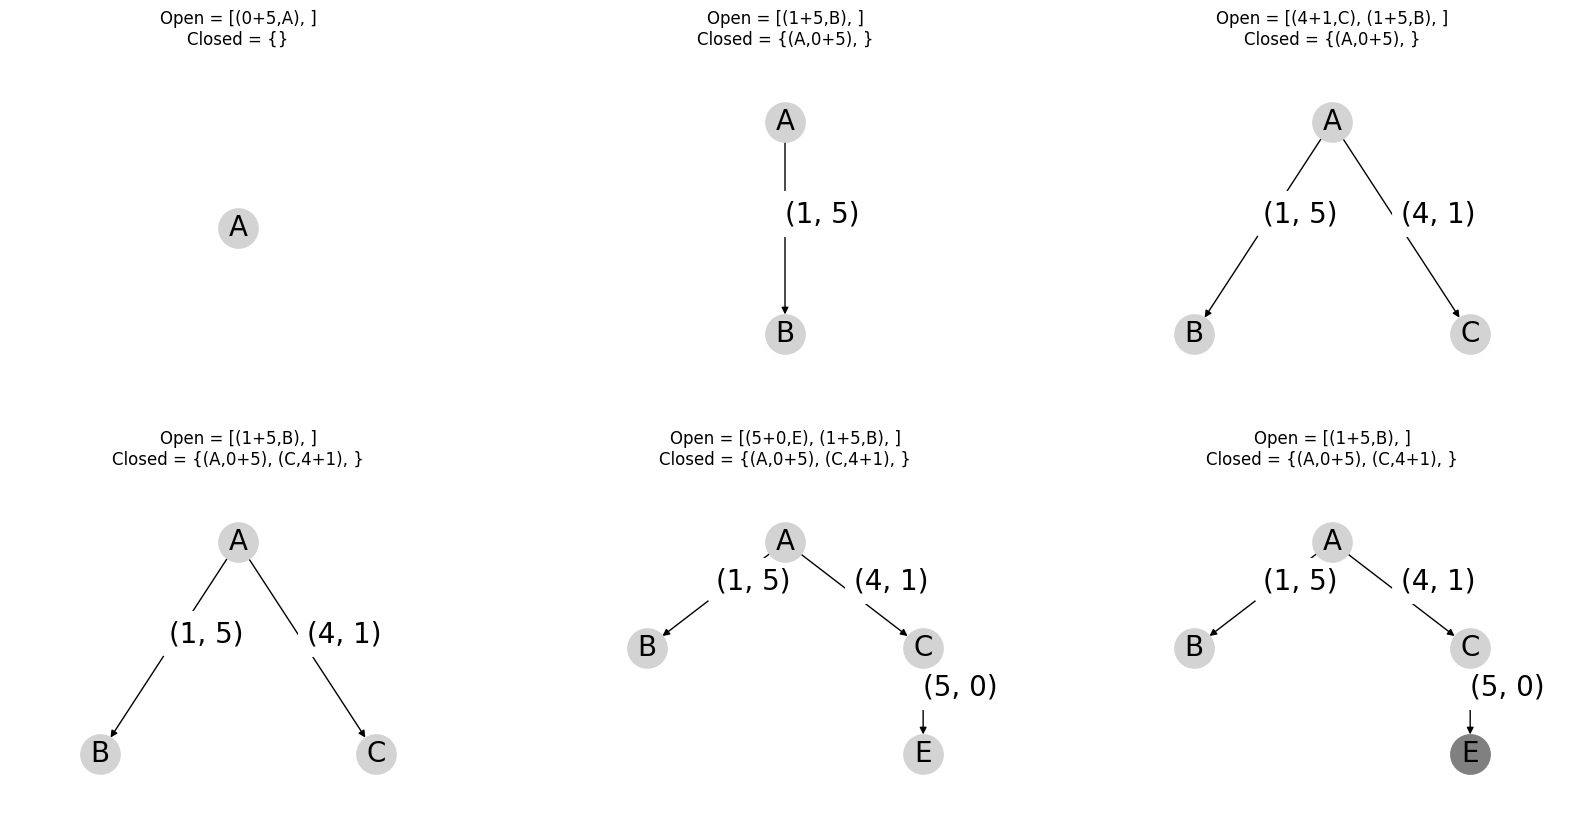

In [9]:
import matplotlib.pyplot as plt

nrows=2; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axes = iter(fig.axes)

def draw_graph(DG, DW, source, Open, Closed, target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.margins(0.25,0.25)
  title="Open = ["
  for (f,g,n) in Open:
    title += "(" + str(g) + "+" + str(f-g) + "," + n + "), " 
  title += "]\n"
  title += "Closed = {"
  for n in Closed:
    (gn,fn) = Closed[n]
    title += "(" + n + "," + str(gn) + "+" + str(fn-gn) + "), "
  title += "}"
  ax.set_title(title) 
  #ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG, prog='dot', root=source)
  nx.draw(nxDG, pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_edge_labels(nxDG, pos=pos_nodes, edge_labels=DW, label_pos=0.5, font_size=20, 
    horizontalalignment="left",verticalalignment="bottom", ax=ax, rotate=False)
  nx.draw_networkx_nodes(nxDG, pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
def astar(G, W, source, Target, h):
  gn = 0
  fn = gn + h[source]
  Openh = []; heapq.heappush(Openh,(fn,gn,source)); 
  Opend = {}; Opend[source] = (gn,fn)
  Closed = {}
  DG = {source:[]}
  DW = {}
  draw_graph(DG, DW, source, Openh, Closed)
  while Openh != []:
    (fs,gs,s) = heapq.heappop(Openh); del Opend[s[0]]
    if s[0] in Target:
      draw_graph(DG, DW, source, Openh, Closed, [s])
      return s
    Closed[s] = (gs,fs)
    Adj = DG[s]
    for n in G[s[0]]:
      gn = gs + W[(s[0],n[0])]
      fn = gn + h[n]
      if n not in Closed:
        if n not in Opend:
          Opend.update({n: (gn,fn)})
          while n in DG: n+="'"
          heapq.heappush(Openh,(fn,gn,n)); 
          Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):(gn,fn-gn)})
        else:
          (ogn,ofn) = Opend[n]
          # Existing node with better fn -> update
          if fn < ofn:
            Opend[n] = (gn,fn)
            while n in DG: n+="'"
            if len(n)>1: n=n[:-1]
            i = Openh.index((ofn,ogn,n))
            n+="'"
            Openh[i] = (fn,gn,n)
            heapq._siftdown(Openh,0,i)
            Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):(gn,fn-gn)})
      else:
        (ogn,ofn) = Closed[n]
        # Existing node with better fn -> update
        if fn < ofn:
          del Closed[n]
          heapq.heappush(Openh,(fn,gn,n)); Opend.update({n: (gn,fn)})
      draw_graph(DG, DW, source, Openh, Closed)
          
print(astar(G,W,source,Target,h))

### Admissibility and consistency of a heuristic function

A heuristic function $h$ is admissible if, for all node $n$: $h(n) \leq h^*(n)$  

$h$ is monotone or consistent if, for all node $n$:  
> $h(n) \leq w(n,n') + h(n')$ for all $n'$ adjacent to $n$  

or equivalently:  
> $f(n) \leq f(n')$ for all $n'$ adjacent to $n$  

All heuristic function that is consistent is admissible, but not the other way around. See examples below

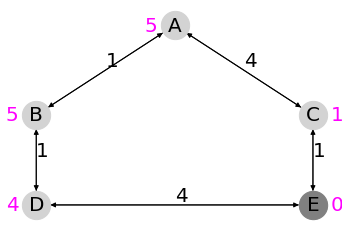

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('B','A'): 1, ('A', 'C'): 4, ('C','A'): 4, ('C','E'): 1, ('E','C'): 1, ('B','D'): 1, ('D','B'): 1, ('D','E'): 4, ('E','D'): 4}
h={"A": 5, "B": 5, "C": 1, "D": 4, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
pos_h = {'A': (18.25, 300), 'B': (8.25, 200), 'C': (31.75, 200), 'D': (8.25, 100), 'E': (31.75, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)

$h(A) \leq w(A,B)+h(B)$  
$h(A) \leq w(A,C)+h(C)$  
$h(B) \leq w(B,A)+h(A)$  
$h(B) \leq w(B,D)+h(D)$  
$h(C) \leq w(C,A)+h(A)$  
$h(C) \leq w(C,E)+h(E)$  
$h(D) \leq w(D,B)+h(B)$  
$h(D) \leq w(D,E)+h(E)$  
$h(E) \leq w(E,C)+h(C)$  
$h(E) \leq w(E,D)+h(D)$  

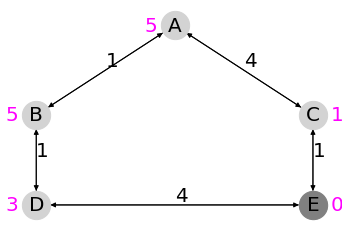

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('B','A'): 1, ('A', 'C'): 4, ('C','A'): 4, ('C','E'): 1, ('E','C'): 1, ('B','D'): 1, ('D','B'): 1, ('D','E'): 4, ('E','D'): 4}
h={"A": 5, "B": 5, "C": 1, "D": 3, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
pos_h = {'A': (18.25, 300), 'B': (8.25, 200), 'C': (31.75, 200), 'D': (8.25, 100), 'E': (31.75, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)

$h(B) \nleq w(B,D)+h(D)$

### Optimality and complexity

**Completeness**  
A* is complete, if there is a solution, it will find it.

**Optimality**  
If the heuristic function $h$, A* returns the optimal solution; A* is said to be admissible.

If the heuristic function $h$ is consistent, the nodes are expanded in a non-decreasing order of function $f$ through optimal paths:
> A* does not reopen closed nodes (it does not need to be implemented)  
> A* is equivalent to UCS/Dijkstra algorithm with reduced costs  
> A* is optimally efficient, this means that there is no other algorithm that using the same heuristic nodes will expand less nodes.

**Complexity**  
The same as UCS/Dijkstra, if function $h$ is consistent.
